<a href="https://colab.research.google.com/github/knozdogan/visualize-sound/blob/master/visualize_sound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VISUALIZING SOUND**

---

In the lecture of visualizing sound, we know that there are three way to visualize sound:


*   Oscilloscope display
*   Spectrum analyzer
*   Spectrogram analysis

## Oscilloscope Display

To visualize sound, firstly, we have to import necessary libraries in Python.


In [0]:
import warnings
warnings.simplefilter("ignore")   # used for unnecessity warning outputs

import numpy as np
from scipy.io import wavfile
from IPython.display import Audio
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#%matplotlib inline

In [0]:
file_path = "./bass-guitar.wav"
fs, data = wavfile.read(file_path)
audio = data[:,0]   # get one channel from stereo file
num_samples = len(audio)
print("Sampling frequency: {} \t Number of samples: {}".format(fs, num_samples))

Sampling frequency: 44100 	 Number of samples: 384873


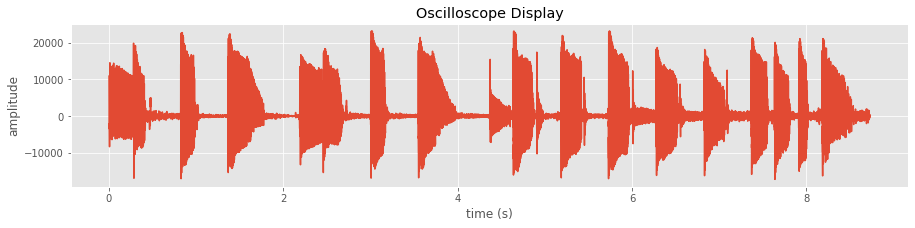

In [0]:
time = np.linspace(0,len(audio)/fs,len(audio))  # x-axis
plt.figure(figsize=[15,3])
plt.plot(time,audio)
plt.title("Oscilloscope Display")
plt.xlabel("time (s)")
plt.ylabel("amplitude")
plt.show()

In the oscilloscope display, it can be seen that amplitude values changes between -32768 and 32767 on account of bit depth of the sound file.

## Spectrum Analyzer

### The math behind spectrum analysis:
To reveal frequency spectrum of a signal, we use Fourier Transform, which is formulated below;

\begin{equation*}
x(t) = \sum_{n=-\infty}^{+\infty} c_n e^{jnw_0 t}
\end{equation*}

It means that any signal can be decomposed to sinosoid signals multiplied by coefficients ($c_n$). However, we cannot use this formula in the computer world. Also, note that $x(t)$ is a continuous and periodic signal in this formula. The audio file read in the previous section is a discrete and a periodic signal, which can be understood in oscilloscope display.
I would like to show that we use Fast Fourier Transform algorithm, shortly FFT.

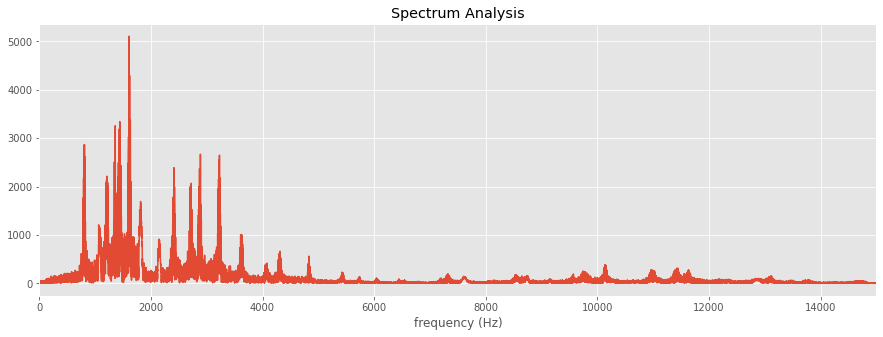

In [0]:
from scipy.fft import fft
T = 1/fs
N = len(audio)
audio = audio / 32768 
audio_fft = fft(audio)
plt.figure(figsize=[15,5])
plt.plot(np.abs(audio_fft[:(N//2-1)]))
plt.xlim(0,15000)
plt.title("Spectrum Analysis")
plt.xlabel("frequency (Hz)")
plt.show()

## Spectrogram Analysis

In that display, x-axis is time, y-axis is frequency, and z-axis is amplitude. In this display, we use short time fourier transform (STFT).

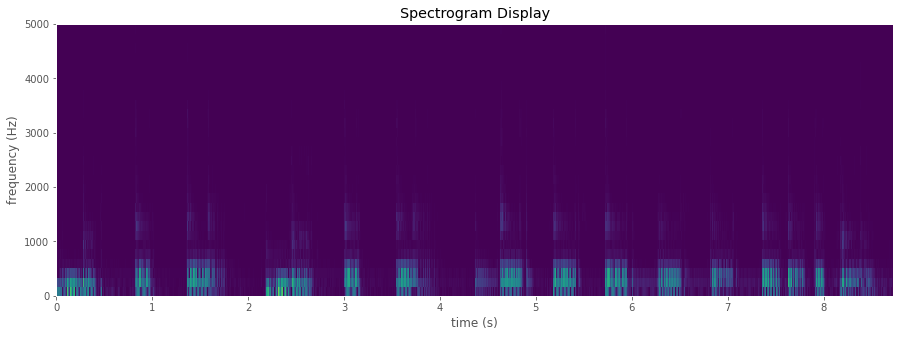

In [0]:
from scipy.signal import stft
f, t, Zxx = stft(audio, fs)
plt.figure(figsize=[15,5])
plt.pcolormesh(t, f, np.abs(Zxx))
plt.ylim(0,5000)
plt.title("Spectrogram Display")
plt.xlabel("time (s)")
plt.ylabel("frequency (Hz)")
plt.show()